In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing , inspecting data
from google.colab import files
uploaded = files.upload()

Saving railway.csv to railway.csv


In [ ]:
df=pd.read_csv('railway.csv')
df.sample(10) #check the data

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
4539,b0cf6f8b-f09f-4c8e-8e49,2024-01-18,07:24:54,Online,Credit Card,NaN,Standard,Anytime,25,London Paddington,Reading,2024-01-18,07:45:00,08:45:00,NaN,Cancelled,Traffic,No
28128,36c5d238-40ad-42ad-aec3,2024-04-17,11:04:14,Online,Credit Card,Adult,Standard,Off-Peak,8,London St Pancras,Birmingham New Street,2024-04-17,12:30:00,13:50:00,13:50:00,On Time,NaN,No
3087,02813bac-367b-468a-84d6,2024-01-13,03:51:29,Online,Credit Card,NaN,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-14,02:15:00,03:35:00,03:35:00,On Time,NaN,No
20515,546532be-f8e2-4199-abfd,2024-03-19,05:00:41,Station,Credit Card,NaN,First Class,Anytime,107,London St Pancras,Birmingham New Street,2024-03-19,06:30:00,07:50:00,07:50:00,On Time,NaN,No
16089,1e7148ab-7ac1-4976-a2a7,2024-03-02,19:32:56,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-03-03,18:00:00,19:00:00,19:00:00,On Time,NaN,No
15544,a84fb219-92dd-4c8c-9e35,2024-02-24,20:07:56,Station,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-02-25,18:30:00,19:00:00,19:00:00,On Time,NaN,No
14844,62575284-005b-44c1-96fb,2024-02-19,16:47:01,Online,Credit Card,Adult,Standard,Advance,5,London St Pancras,Birmingham New Street,2024-02-25,15:15:00,16:35:00,16:35:00,On Time,NaN,No
23929,ea8958fb-6d7f-4e3d-a3cb,2024-04-01,09:12:59,Online,Credit Card,Disabled,Standard,Advance,4,York,Doncaster,2024-04-02,07:30:00,08:00:00,NaN,Cancelled,Weather Conditions,No
3205,ff485177-2cf0-4d04-becc,2024-01-13,13:19:30,Online,Contactless,NaN,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-14,11:45:00,13:05:00,13:05:00,On Time,NaN,No
31229,88d71d99-ad2a-4055-9d76,2024-04-28,20:20:23,Online,Credit Card,NaN,Standard,Advance,5,Birmingham New Street,Tamworth,2024-04-29,18:45:00,19:05:00,19:05:00,On Time,NaN,No


In [ ]:
df.info() #check the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [ ]:
df.describe() #check the data statistics

,Price
count,31653.000000
mean,23.439200
std,29.997628
min,1.000000
25%,5.000000
50%,11.000000
75%,35.000000
max,267.000000


In [ ]:
# Calculate Q1 and Q3 for the specific column
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

Q1: 5.0, Q3: 35.0, IQR: 30.0


In [ ]:
# Preproccesing Data
df['Departure Station'].value_counts()

,count
Departure Station,
Manchester Piccadilly,5650
London Euston,4954
Liverpool Lime Street,4561
London Paddington,4500
London Kings Cross,4229
London St Pancras,3891
Birmingham New Street,2136
York,927
Reading,594


In [ ]:
df['Railcard'].value_counts()

,count
Railcard,
Adult,4846
Disabled,3089
Senior,2800


In [ ]:
df['Arrival Destination'].value_counts()

,count
Arrival Destination,
Birmingham New Street,7742
Liverpool Lime Street,5022
York,4019
Manchester Piccadilly,3968
Reading,3920
London Euston,1567
London St Pancras,749
Oxford,623
London Paddington,351


In [ ]:
df['Ticket Class'].value_counts()

,count
Ticket Class,
Standard,28595
First Class,3058


In [ ]:
df['Date of Purchase'].value_counts()

,count
Date of Purchase,
2024-02-02,513
2024-02-03,493
2024-01-31,425
2024-02-04,421
2024-02-07,415
...,...
2023-12-30,1
2023-12-27,1
2023-12-20,1


In [ ]:
df['Time of Purchase'].value_counts()

,count
Time of Purchase,
08:16:53,6
08:21:17,6
17:25:24,6
08:00:58,6
09:31:25,6
...,...
08:14:20,1
08:08:48,1
08:07:57,1


In [ ]:
df.isna().sum() #check the missing values

,0
Transaction ID,0
Date of Purchase,0
Time of Purchase,0
Purchase Type,0
Payment Method,0
Railcard,20918
Ticket Class,0
Ticket Type,0
Price,0
Departure Station,0


In [ ]:
# DATA CLEANING

In [ ]:
# Drop rows with missing values
df = df.drop(columns=['Reason for Delay'])
df = df.drop(columns=['Actual Arrival Time'])

In [ ]:
df['Railcard'].fillna(df['Railcard'].mode()[0], inplace=True) # null to mode in column

<ipython-input-16-5a2941d96fa6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Railcard'].fillna(df['Railcard'].mode()[0], inplace=True) # null to mode in column


In [ ]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')

In [ ]:
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'], errors='coerce')

In [ ]:
df.sample(10)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Journey Status,Refund Request
8338,71a8cb60-75a9-40f3-ba96,2024-01-31,15:17:01,Station,Contactless,Adult,Standard,Anytime,70,London Kings Cross,York,2024-01-31,17:45:00,19:35:00,On Time,No
4342,a935117a-6cc7-4443-b3f5,2024-01-17,14:17:33,Online,Credit Card,Adult,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-01-17,15:45:00,17:05:00,On Time,No
21765,efa02399-03e0-4ede-8fd3,2024-03-23,18:14:11,Online,Contactless,Adult,Standard,Advance,3,Manchester Piccadilly,Liverpool Lime Street,2024-03-24,16:30:00,17:00:00,On Time,No
30709,f3c4251d-10c7-4be1-8ecf,2024-04-27,01:15:41,Online,Credit Card,Adult,Standard,Off-Peak,19,London Paddington,Reading,2024-04-27,23:45:00,00:45:00,On Time,No
23172,feff473a-4bd9-4cf3-98ba,2024-03-28,21:00:32,Station,Contactless,Adult,Standard,Advance,35,London Kings Cross,York,2024-03-29,19:30:00,21:20:00,On Time,No
24924,490466f0-e18f-44d3-98f8,2024-04-05,17:39:46,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-04-06,16:00:00,17:50:00,On Time,No
7806,b56e8b55-b70d-4a34-ac7d,2024-01-29,16:46:56,Station,Credit Card,Adult,Standard,Anytime,16,London St Pancras,Birmingham New Street,2024-01-29,18:15:00,19:35:00,On Time,No
6265,4c8f4033-37be-4274-a974,2024-01-24,09:03:01,Online,Credit Card,Adult,Standard,Advance,3,London Paddington,London Waterloo,2024-01-25,07:30:00,09:00:00,On Time,No
1732,e1dc9df8-d316-4700-a6e1,2024-01-08,04:48:18,Online,Credit Card,Senior,Standard,Anytime,3,Manchester Piccadilly,Liverpool Lime Street,2024-01-08,06:15:00,06:45:00,On Time,No
22529,22d2b1dd-7083-4195-9069,2024-03-26,10:33:52,Online,Contactless,Adult,First Class,Off-Peak,80,London St Pancras,Birmingham New Street,2024-03-26,12:00:00,13:20:00,On Time,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       31653 non-null  object        
 1   Date of Purchase     31653 non-null  datetime64[ns]
 2   Time of Purchase     31653 non-null  object        
 3   Purchase Type        31653 non-null  object        
 4   Payment Method       31653 non-null  object        
 5   Railcard             31653 non-null  object        
 6   Ticket Class         31653 non-null  object        
 7   Ticket Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure Station    31653 non-null  object        
 10  Arrival Destination  31653 non-null  object        
 11  Date of Journey      31653 non-null  datetime64[ns]
 12  Departure Time       31653 non-null  object        
 13  Arrival Time         31653 non-

In [ ]:
df.duplicated().sum() #check the duplicated values

0

In [ ]:
#Exploring and Data Analysis

In [ ]:
df.sample(10)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Journey Status,Refund Request
23122,7474d9db-5eab-423e-a0f4,2024-03-28,16:55:58,Online,Contactless,Disabled,Standard,Anytime,47,London Kings Cross,York,2024-03-28,18:15:00,20:05:00,On Time,No
6769,2793ee27-5420-4b7b-9cca,2024-01-26,03:41:11,Online,Credit Card,Adult,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-27,02:00:00,02:30:00,On Time,No
25944,d969cdde-1656-423c-b5ca,2024-04-09,12:20:49,Online,Credit Card,Adult,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-09,13:45:00,15:05:00,On Time,No
22404,ca6f4615-7997-4d75-9820,2024-03-25,22:42:33,Station,Credit Card,Adult,Standard,Advance,3,Manchester Piccadilly,Liverpool Lime Street,2024-03-26,21:00:00,21:30:00,On Time,No
8629,de14599e-6c9c-44ba-ad96,2024-02-01,13:10:50,Online,Contactless,Adult,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-02-01,14:30:00,15:00:00,On Time,No
10928,c450a909-6206-439e-b646,2024-02-06,20:23:07,Online,Contactless,Adult,Standard,Advance,3,Manchester Piccadilly,Liverpool Lime Street,2024-02-16,18:45:00,19:15:00,On Time,No
28592,0be554de-9767-434a-b8fe,2024-04-19,05:10:30,Online,Credit Card,Adult,Standard,Anytime,13,London Euston,Birmingham New Street,2024-04-19,06:30:00,07:50:00,On Time,No
26893,b62fdd3c-11ff-4ef0-ad5f,2024-04-12,23:32:53,Online,Credit Card,Adult,Standard,Advance,13,London Paddington,Reading,2024-04-13,01:00:00,02:00:00,On Time,No
3152,52316cae-86b0-4f3c-9f20,2024-01-13,08:14:04,Online,Credit Card,Disabled,Standard,Advance,4,York,Doncaster,2024-01-14,06:30:00,07:00:00,On Time,No
25346,4ca83d7c-aae2-4c35-a751,2024-04-07,07:52:17,Online,Contactless,Disabled,Standard,Off-Peak,36,London Kings Cross,Edinburgh Waverley,2024-04-07,16:00:00,20:20:00,On Time,No


Average ticket price for each ticket type:
Ticket Type
Advance     17.611412
Anytime     39.196442
Off-Peak    25.518510
Name: Price, dtype: float64


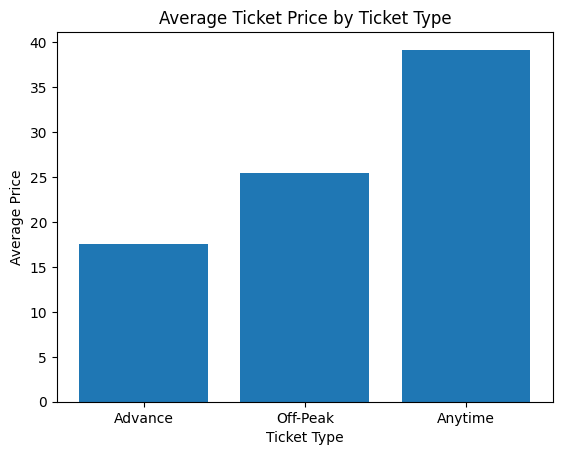

In [ ]:
required_columns = ['Ticket Type', 'Price']
if all(column in df.columns for column in required_columns):
    # Group by 'Ticket Type' and calculate the average price
    average_price_per_type = df.groupby('Ticket Type')['Price'].mean()

    # Display the result
print("Average ticket price for each ticket type:")
print(average_price_per_type)
average_price = {
    "Advance": 17.61,
    "Off-Peak": 25.52,
    "Anytime": 39.19
}
ticket_types = list(average_price.keys())
prices = list(average_price.values())

plt.bar(ticket_types, prices)
plt.title("Average Ticket Price by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Average Price")
plt.show()

Average ticket price based on Railcard ownership:
Railcard
Adult       25.618188
Disabled    16.923924
Senior      10.577143
Name: Price, dtype: float64


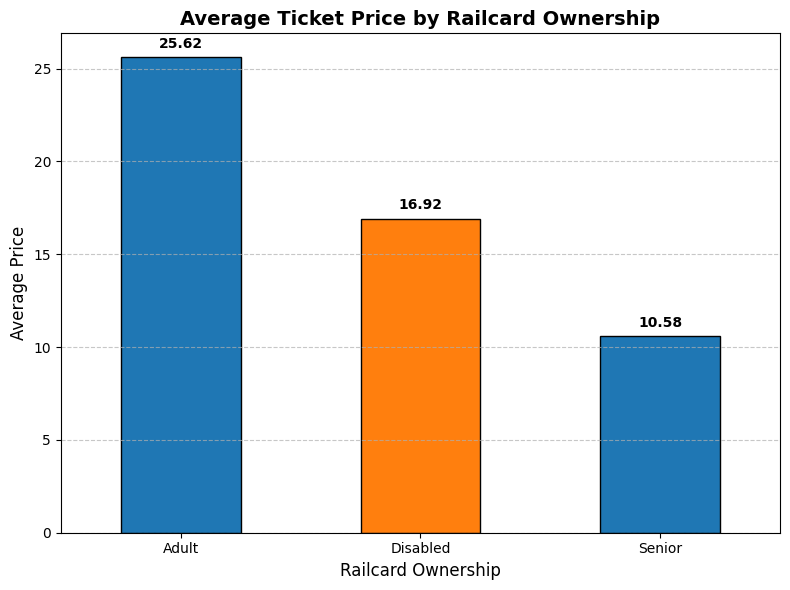

In [ ]:
# Ensure the necessary columns are present
required_columns = ['Railcard', 'Price']
if all(column in df.columns for column in required_columns):
    # Group by 'Railcard' and calculate the average price
    average_price_by_railcard = df.groupby('Railcard')['Price'].mean()

    # Display the result
    print("Average ticket price based on Railcard ownership:")
    print(average_price_by_railcard)
# Plotting the results as a bar chart
    plt.figure(figsize=(8, 6))
    average_price_by_railcard.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], edgecolor='black')
    plt.title("Average Ticket Price by Railcard Ownership", fontsize=14, weight='bold')
    plt.xlabel("Railcard Ownership", fontsize=12)
    plt.ylabel("Average Price", fontsize=12)
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add annotations to the bars
    for index, value in enumerate(average_price_by_railcard):
        plt.text(index, value + 0.5, f"{value:.2f}", ha='center', fontsize=10, weight='bold')

    plt.tight_layout()
    plt.show()

Average ticket price for each ticket class:
Ticket Class
First Class    48.855134
Standard       20.721175
Name: Price, dtype: float64
The price difference between the highest and lowest classes is: 28.13395904395878


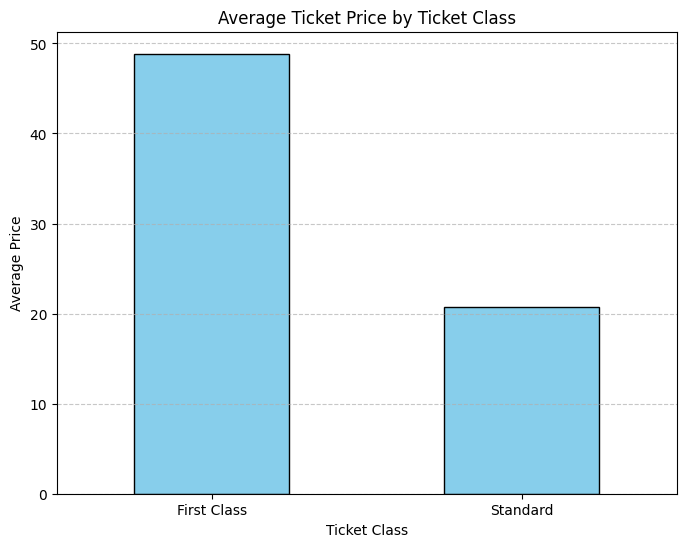

In [ ]:
# Ensure the necessary columns are present
required_columns = ['Ticket Class', 'Price']
if all(column in df.columns for column in required_columns):
    # Group by 'Ticket Class' and calculate the average price
    average_price_by_class = df.groupby('Ticket Class')['Price'].mean()

    # Display the result
    print("Average ticket price for each ticket class:")
    print(average_price_by_class)

    # Check for significant differences (optional)
    if len(average_price_by_class) > 1:
        difference = average_price_by_class.max() - average_price_by_class.min()
        print(f"The price difference between the highest and lowest classes is: {difference}")

  # Plotting the results as a bar chart
    plt.figure(figsize=(8, 6))
    average_price_by_class.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Average Ticket Price by Ticket Class")
    plt.xlabel("Ticket Class")
    plt.ylabel("Average Price")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Stations with the highest number of Transaction IDs:
Departure Station
Manchester Piccadilly    5650
London Euston            4954
Liverpool Lime Street    4561
London Paddington        4500
London Kings Cross       4229
London St Pancras        3891
Birmingham New Street    2136
York                      927
Reading                   594
Oxford                    144
Edinburgh Waverley         51
Bristol Temple Meads       16
Name: count, dtype: int64

Stations requiring capacity increase:
Departure Station
Manchester Piccadilly    5650
London Euston            4954
Name: count, dtype: int64


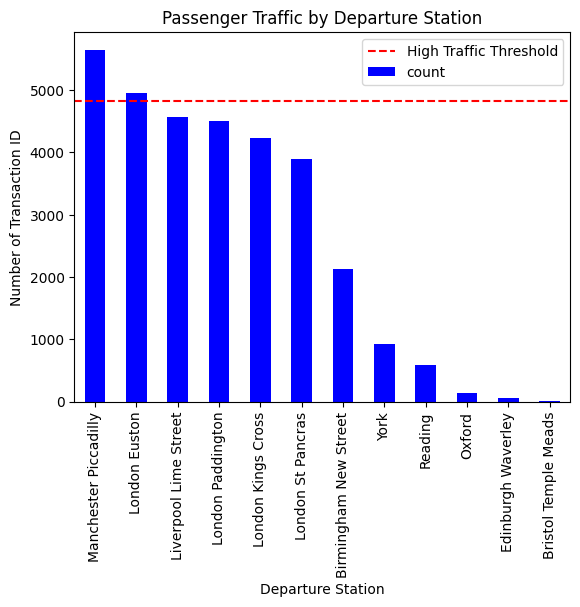

In [ ]:
# Ensure the necessary column is present
required_columns = ['Departure Station']
if 'Departure Station' in df.columns:
    # Count the number of tickets or passengers per station
    station_counts = df['Departure Station'].value_counts()

    # Display the stations with the highest traffic
    print("Stations with the highest number of Transaction IDs:")
    print(station_counts)

    # Highlight stations with high traffic (e.g., above a certain threshold)
    threshold = station_counts.mean() + station_counts.std()  # Example threshold
    high_traffic_stations = station_counts[station_counts > threshold]
    print("\nStations requiring capacity increase:")
    print(high_traffic_stations)
# Assuming `station_counts` contains the results
station_counts.plot(kind='bar', color='Blue', title="Passenger Traffic by Departure Station")
plt.xlabel("Departure Station")
plt.ylabel("Number of Transaction ID")
plt.axhline(y=threshold, color='red', linestyle='--', label='High Traffic Threshold')
plt.legend()
plt.show()


Unique ticket purchases by time period:
Time Period
Morning      11530
Afternoon     6172
Evening       7564
Night         6387
Name: Transaction ID, dtype: int64

High-demand periods requiring more tickets:
Time Period
Morning    11530
Name: Transaction ID, dtype: int64


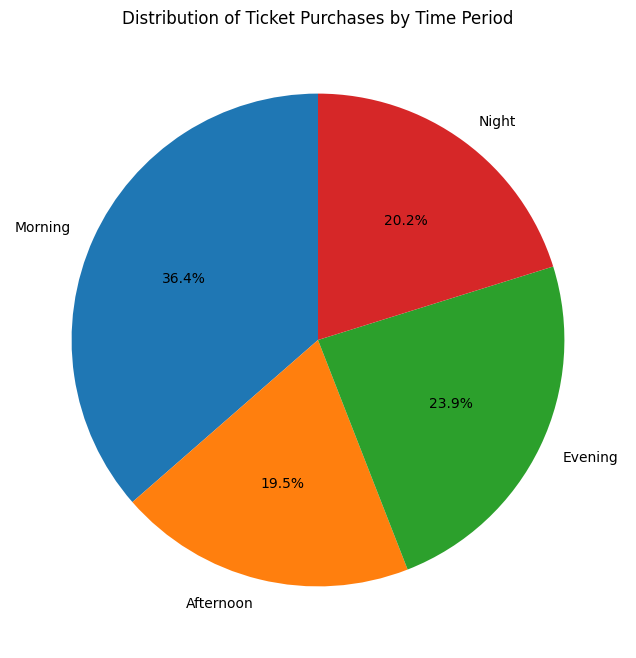

In [ ]:
# Ensure the required columns are present
if 'Transaction ID' in df.columns and 'Time of Purchase' in df.columns:
    # Convert 'Purchase Time' to datetime
    df['Time of Purchase'] = pd.to_datetime(df['Time of Purchase'])

    # Extract the hour of purchase for classification
    df['Purchase Hour'] = df['Time of Purchase'].dt.hour

    # Define a function to classify time periods
    def classify_time_period(hour):
        if 5 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 17:
            return 'Afternoon'
        elif 17 <= hour < 21:
            return 'Evening'
        else:
            return 'Night'

    # Apply the classification to create a new column
    df['Time Period'] = df['Purchase Hour'].apply(classify_time_period)

    # Count unique Transaction IDs by time period
    ticket_counts_by_period = df.groupby('Time Period')['Transaction ID'].nunique()

    # Sort results to ensure proper time order
    ticket_counts_by_period = ticket_counts_by_period[['Morning', 'Afternoon', 'Evening', 'Night']]

    # Display the busiest periods
    print("Unique ticket purchases by time period:")
    print(ticket_counts_by_period)

    # Identify high-demand periods using a threshold (mean + std deviation)
    threshold = ticket_counts_by_period.mean() + ticket_counts_by_period.std()
    high_demand_periods = ticket_counts_by_period[ticket_counts_by_period > threshold]

    print("\nHigh-demand periods requiring more tickets:")
    print(high_demand_periods)
# Plot the results
 # Display the distribution in a pie chart
    plt.figure(figsize=(8, 8))
    ticket_counts_by_period.plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        legend=False,
        labels=ticket_counts_by_period.index,
        title="Distribution of Ticket Purchases by Time Period",
        ylabel=""
    )
    plt.show()



Unique values in 'Journey Status':
['On Time' 'Delayed' 'Cancelled']
Delays or Cancellations by Departure Time:
Formatted Departure Time
00:00    52
00:15     8
00:30     6
01:00     5
01:15     1
         ..
22:30     2
22:45     2
23:15     2
23:30     9
23:45    21
Name: count, Length: 92, dtype: int64


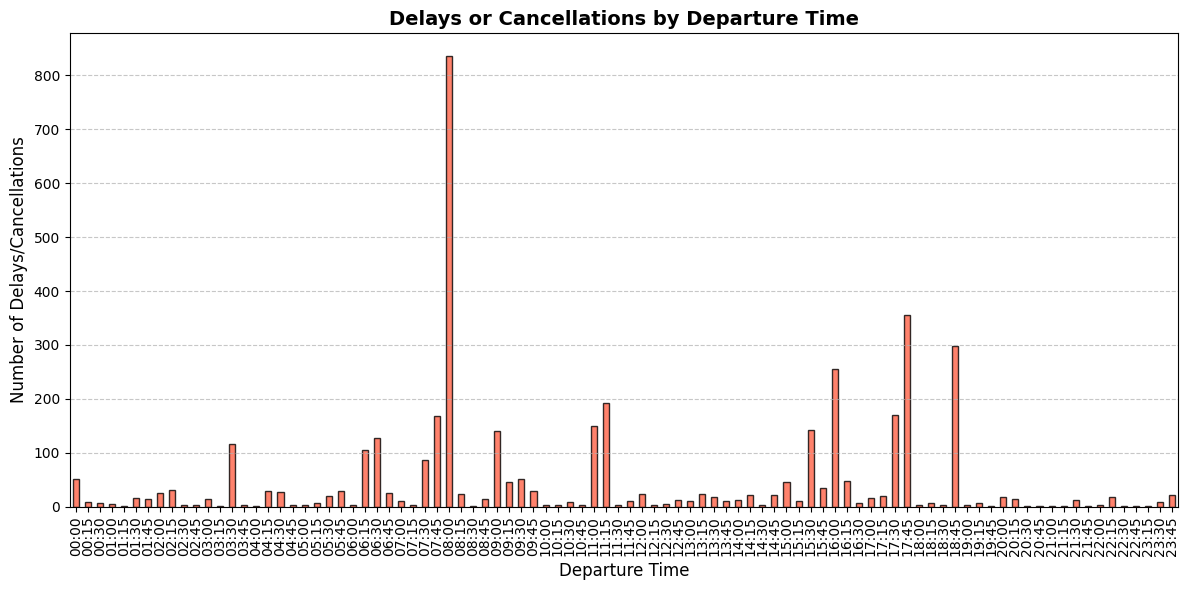

In [ ]:
# Step 1: Ensure required columns are present
if 'Departure Time' in df.columns and 'Journey Status' in df.columns:
    # Step 2: Check unique values in 'Journey Status'
    print("Unique values in 'Journey Status':")
    print(df['Journey Status'].unique())

    # Step 3: Clean 'Journey Status' column and filter for 'Delayed' or 'Cancelled'
    df['Journey Status'] = df['Journey Status'].str.strip().str.lower()
    delayed_or_cancelled = df[df['Journey Status'].isin(['delayed', 'cancelled'])]

    # Step 4: Check if 'Departure Time' is valid and convert to datetime
    df['Departure Time'] = pd.to_datetime(df['Departure Time'], errors='coerce')
    delayed_or_cancelled = delayed_or_cancelled.dropna(subset=['Departure Time'])

    # Step 5: Check if filtered data is not empty
    if delayed_or_cancelled.empty:
        print("No delays or cancellations found in the dataset.")
    else:
        # Extract and format 'Departure Time' for analysis
        delayed_or_cancelled['Formatted Departure Time'] = delayed_or_cancelled['Departure Time'].dt.strftime('%H:%M')

        # Count occurrences of delays/cancellations by formatted departure time
        delay_counts = delayed_or_cancelled['Formatted Departure Time'].value_counts().sort_index()

        # Display the results
        print("Delays or Cancellations by Departure Time:")
        print(delay_counts)

        # Step 6: Plot the results
        plt.figure(figsize=(12, 6))
        delay_counts.plot(kind='bar', color='tomato', edgecolor='black', alpha=0.8)
        plt.title("Delays or Cancellations by Departure Time", fontsize=14, weight='bold')
        plt.xlabel("Departure Time", fontsize=12)
        plt.ylabel("Number of Delays/Cancellations", fontsize=12)
        plt.xticks(rotation=90, fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

In [ ]:
df

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Journey Status,Refund Request,Purchase Hour,Time Period,Departure Hour
0,da8a6ba8-b3dc-4677-b176,2023-12-08,2025-01-20 12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,2025-01-20 11:00:00,13:30:00,on time,No,12,Afternoon,11
1,b0cdd1b0-f214-4197-be53,2023-12-16,2025-01-20 11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,2025-01-20 09:45:00,11:35:00,delayed,No,11,Morning,9
2,f3ba7a96-f713-40d9-9629,2023-12-19,2025-01-20 19:51:27,Online,Credit Card,Adult,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,2025-01-20 18:15:00,18:45:00,on time,No,19,Evening,18
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,2025-01-20 23:00:36,Station,Credit Card,Adult,Standard,Advance,13,London Paddington,Reading,2024-01-01,2025-01-20 21:30:00,22:30:00,on time,No,23,Night,21
4,2be00b45-0762-485e-a7a3,2023-12-27,2025-01-20 18:22:56,Online,Contactless,Adult,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,2025-01-20 16:45:00,19:00:00,on time,No,18,Evening,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31648,1304623d-b8b7-4999-8e9c,2024-04-30,2025-01-20 18:42:58,Online,Credit Card,Adult,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,2025-01-20 20:00:00,20:30:00,on time,No,18,Evening,20
31649,7da22246-f480-417c-bc2f,2024-04-30,2025-01-20 18:46:10,Online,Contactless,Adult,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,2025-01-20 20:15:00,21:35:00,on time,No,18,Evening,20
31650,add9debf-46c1-4c75-b52d,2024-04-30,2025-01-20 18:56:41,Station,Credit Card,Adult,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,2025-01-20 20:15:00,20:45:00,on time,No,18,Evening,20
31651,b92b047c-21fd-4859-966a,2024-04-30,2025-01-20 19:51:47,Station,Credit Card,Adult,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,2025-01-20 21:15:00,22:35:00,on time,No,19,Evening,21


In [ ]:
df.to_csv('cleaned_trains.csv', index=False)

In [ ]:
result = df.groupby(['Departure Station', 'Arrival Destination'])['Transaction ID'].count().reset_index()

result = result.rename(columns={'Transaction ID': 'Number of Trips'})

result = result.sort_values(by='Number of Trips', ascending=False)

print(result)

        Departure Station    Arrival Destination  Number of Trips
40  Manchester Piccadilly  Liverpool Lime Street             4628
24          London Euston  Birmingham New Street             4209
30     London Kings Cross                   York             3922
35      London Paddington                Reading             3873
36      London St Pancras  Birmingham New Street             3471
..                    ...                    ...              ...
48  Manchester Piccadilly                   York               15
60                   York     Edinburgh Waverley               15
47  Manchester Piccadilly             Warrington               15
64                   York              Wakefield               15
16  Liverpool Lime Street  Birmingham New Street               14

[65 rows x 3 columns]


In [ ]:
# Check if 'Origin' and 'Destination' columns exist
if 'Dep' in data.columns and 'Destination' in data.columns:
    # Create a new 'Route' column by combining 'Origin' and 'Destination'
    data['Route'] = data['Origin'] + " - " + data['Destination']

    # Display the first few rows to verify
    print(data[['Origin', 'Destination', 'Route']].head())